In [40]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

# Step 1 Load and Preprocess Data:
Load the Breast Cancer Wisconsin dataset using
scikit-learn. Standardize the features to have zero mean and unit variance.
Encode the labels (Malignant: 1, Benign: 0).

In [41]:
data = load_breast_cancer(return_X_y=True, as_frame=True)
X, y = data

**Standardize** the features to have zero mean and unit variance.

In [42]:
scaler = StandardScaler()
X_trans = scaler.fit_transform(X)
print(X_trans)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


Encode the labels (Malignant: 1, Benign: 0).




In [43]:
label_encoder = LabelEncoder()
y_trans = label_encoder.fit_transform(y)

In [44]:
print(y_trans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

# Step 2 Split Data:
Split the dataset into training and testing sets using a reasonable
split ratio (e.g., 80 percentage training, 20 percentage testing).

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X_trans, y_trans, test_size=0.2, random_state=17)

In [46]:
print(f"X_test size: {X_test.shape[0]}")
print(f"y size: {y.shape[0]}")
print(f"X size: {X.shape[0]}")

X_test size: 114
y size: 569
X size: 569


# Step 3 Build Shallow Neural Network:
Create a Shallow Neural Network model using TensorFlow and Keras. Use a simple architecture with one hidden layer and an
appropriate activation function.

In [47]:
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # as it is binary classification
model.add(Dropout(rate=0.1))

# number of neurons based on hidden layer in the paper
# also used A Beginner’s Guide to Shallow Neural Network om medium

Compile the model with binary cross-entropy
loss and the Adam optimizer.


In [48]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Step 4 Train the Model:
Train the model on the training set for a sufficient number
of epochs. Monitor the training process and consider using validation data to
prevent over-fitting.

In [49]:
model.fit(X_train, y_train,
          epochs=150, batch_size=32,
          validation_split=0.1, verbose=1)

# Determining the Right Batch Size for a Neural Network to Get Better and Faster Results @ Medium

Epoch 1/150
13/13 [==============================] - 2s 42ms/step - loss: 1.4523 - accuracy: 0.5770 - val_loss: 0.6522 - val_accuracy: 0.5217
Epoch 2/150
13/13 [==============================] - 0s 7ms/step - loss: 1.5664 - accuracy: 0.5795 - val_loss: 0.5712 - val_accuracy: 0.5870
Epoch 3/150
13/13 [==============================] - 0s 9ms/step - loss: 1.4308 - accuracy: 0.6235 - val_loss: 0.5201 - val_accuracy: 0.7174
Epoch 4/150
13/13 [==============================] - 0s 9ms/step - loss: 1.4543 - accuracy: 0.6357 - val_loss: 0.4852 - val_accuracy: 0.7826
Epoch 5/150
13/13 [==============================] - 0s 8ms/step - loss: 1.2095 - accuracy: 0.6993 - val_loss: 0.4586 - val_accuracy: 0.8696
Epoch 6/150
13/13 [==============================] - 0s 4ms/step - loss: 1.2565 - accuracy: 0.7408 - val_loss: 0.4343 - val_accuracy: 0.8696
Epoch 7/150
13/13 [==============================] - 0s 5ms/step - loss: 1.2356 - accuracy: 0.7922 - val_loss: 0.4092 - val_accuracy: 0.8913
Epoch 8/150


# Step 5 Evaluate Performance:
Calculate and print
metrics: Accuracy Precision Recall Visualize

In [50]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

4/4 [==============================] - 0s 3ms/step


In [51]:
accuracy = accuracy_score(y_test, y_pred)
print('accuracy:% 2f'% (accuracy*100))
precision = precision_score(y_test, y_pred)
print('precision:% 2f'% (precision*100))
recall = recall_score(y_test, y_pred)
print('recall:% 2f'% (recall*100))

accuracy: 97.368421
precision: 97.402597
recall: 98.684211


Confusion Matrix: Visualize the
confusion matrix to gain insights into the models performance. Use a heatmap
for better clarity.

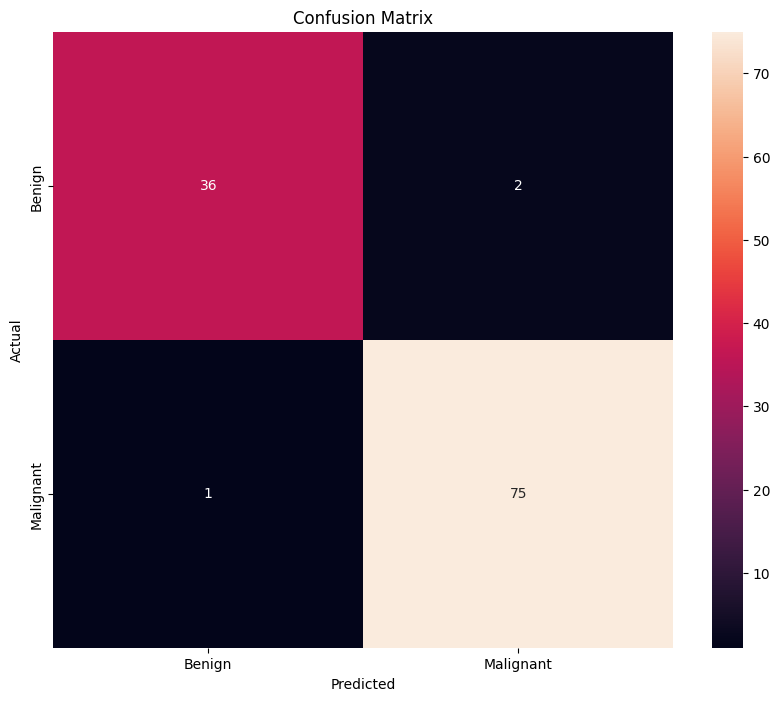

In [52]:
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, fmt='d', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()